Fastfood Nutrition


Fast food is known for its convenience and affordability, but it is also infamous for its high-calorie, high-fat, and high-sugar content. This dataset aims to shed light on the nutritional value of these fast food products, helping consumers make more informed decisions about their food choices.

With information on calories, fat, carbohydrates, protein, and other key nutrients, this dataset provides a valuable resource for nutritionists, researchers, and health-conscious individuals. By analyzing this dataset, we can gain a better understanding of the nutritional impact of fast food consumption and work towards creating healthier food options in the fast food industry.

Dataset - https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition


Performing Linear Regression on the Fastfood Dataset

Importing Libraries

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reading the dataset into a dataframe called 'fastfood'

In [6]:
fastfood = pd.read_csv('fastfood.csv')

A look at the data and some data exploration

In [7]:
fastfood

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


In [8]:
fastfood.head(5)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [9]:
fastfood.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [10]:
fastfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
restaurant     515 non-null object
item           515 non-null object
calories       515 non-null int64
cal_fat        515 non-null int64
total_fat      515 non-null int64
sat_fat        515 non-null float64
trans_fat      515 non-null float64
cholesterol    515 non-null int64
sodium         515 non-null int64
total_carb     515 non-null int64
fiber          503 non-null float64
sugar          515 non-null int64
protein        514 non-null float64
vit_a          301 non-null float64
vit_c          305 non-null float64
calcium        305 non-null float64
salad          515 non-null object
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [11]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

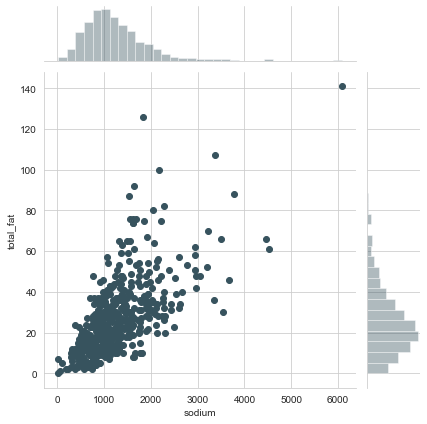

In [15]:
sns.jointplot(x='sodium',y='total_fat',data=fastfood)

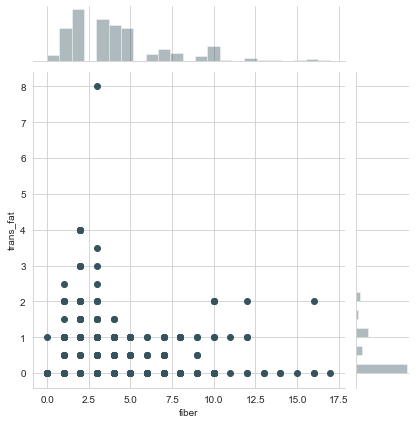

In [18]:
sns.jointplot(x='fiber',y='trans_fat',data=fastfood)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


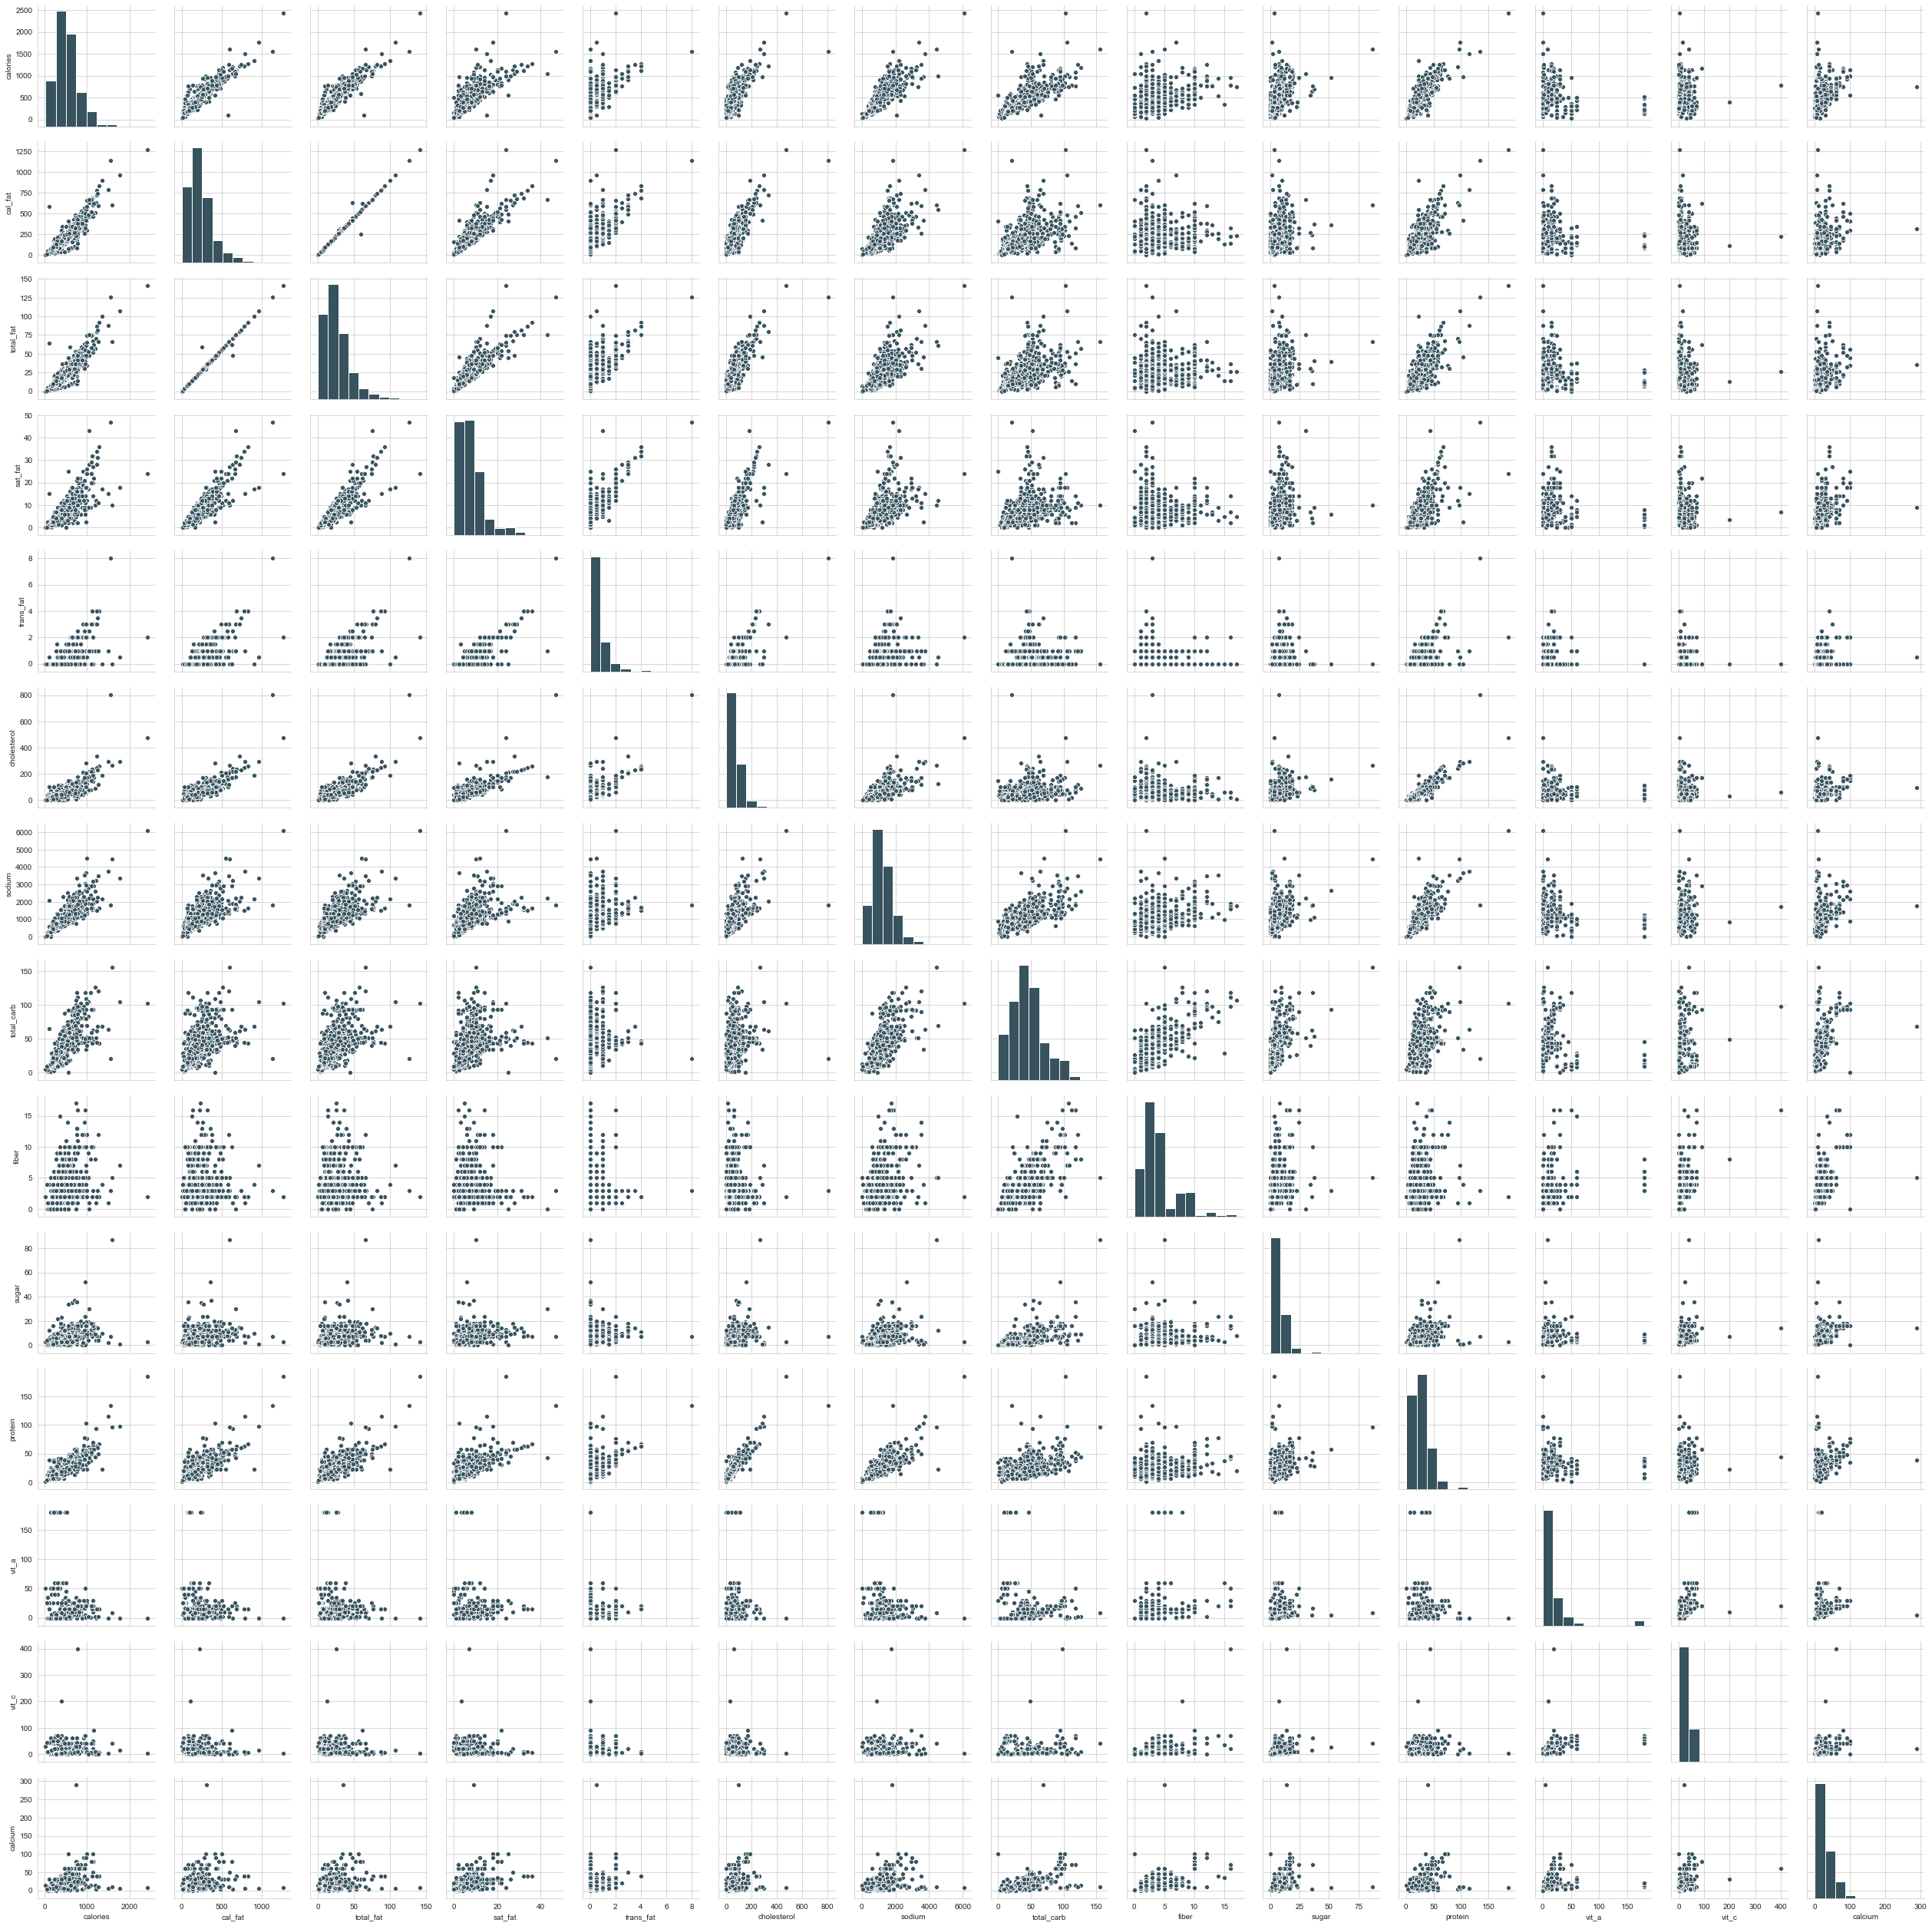

In [19]:
sns.pairplot(fastfood)

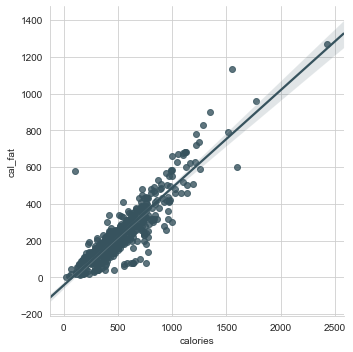

In [21]:
sns.lmplot(x='calories',y='cal_fat',data=fastfood)

In [28]:
X = fastfood[['sodium','calories','sugar','cholesterol']]

In [29]:
y = fastfood['total_fat']

In [30]:
from sklearn.model_selection import train_test_split 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Training the Model

Import LinearRegression from sklearn.linear_model

In [56]:
from sklearn.linear_model import LinearRegression

Creating an instance of a LinearRegression() model named fastfoodlinearmodel.

In [57]:
fastfoodlinearmodel = LinearRegression()

Fit the fast food linear regression model on the training data.

In [58]:
fastfoodlinearmodel.fit(X_train,y_train)

LinearRegression()

Printing out the coefficients of the model

In [59]:
print('Coefficients: \n', fastfoodlinearmodel.coef_)

Coefficients: 
 [-0.00534641  0.06404793 -0.39351809  0.06206806]


Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

Use .predict() to predict off the X_test set of the data

In [60]:
predictions = fastfoodlinearmodel.predict(X_test)

Create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

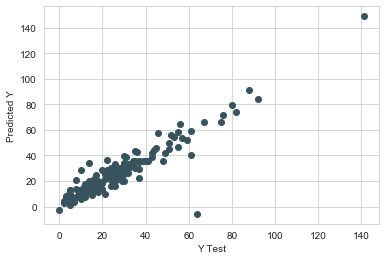

In [61]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [62]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 4.503209018884196
Mean Squared Error: 62.54970833148257
Root Mean Squared Error: 7.9088373564944785


Residuals

Plotting a histogram of the residuals to make sure it looks normally distributed.

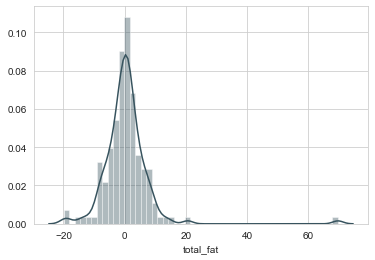

In [63]:
sns.distplot((y_test-predictions),bins=50);